# QUESTION-1

# 1.load the data set

In [1]:
#import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import math
import operator
# 1.loading the data set
attributes = ["sepal_length", "sepal_width", "petal_length", "petal_width", "species"]
data = pd.read_csv('IRIS.data', names = attributes)  # read the csv data
data.columns = attributes  # represents index for columns
print(data)

     sepal_length  sepal_width  petal_length  petal_width         species
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]


# 2.normalise the data set

In [2]:
#normalize the data set
df1=data["sepal_length"]
df2=data["sepal_width"]
df3=data["petal_length"]
df4=data["petal_width"]
print('max value for sepal_length feature  = ',df1.max())
print('min value for sepal_length feature  = ',df1.min())
print('max value for sepal_width feature   = ',df2.max())
print('min value for sepal_width feature   = ',df2.min())
print('max value for petal_length feature  = ',df3.max())
print('min value for petal_length feature  = ',df3.min())
print('max value for petal_width feature   = ',df4.max())
print('min value for petal_width feature   = ',df4.min())

max value for sepal_length feature  =  7.9
min value for sepal_length feature  =  4.3
max value for sepal_width feature   =  4.4
min value for sepal_width feature   =  2.0
max value for petal_length feature  =  6.9
min value for petal_length feature  =  1.0
max value for petal_width feature   =  2.5
min value for petal_width feature   =  0.1


In [3]:
#Normalising the data set
norm = data.drop('species', axis='columns')
norm_values = norm.apply(lambda x:(x-x.min(axis=0))/(x.max(axis=0)-x.min(axis=0)))
norm_values

,sepal_length,sepal_width,petal_length,petal_width
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667
...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667
146,0.555556,0.208333,0.677966,0.750000
147,0.611111,0.416667,0.711864,0.791667
148,0.527778,0.583333,0.745763,0.916667


# 3.distance metric

In [4]:
def EuclideanDistance(data1, data2, length):
    distance = 0
    for x in range(length):
        distance += np.square(data1[x] - data2[x])
    return np.sqrt(distance)

# 4.nearest neighbours

In [5]:
#nearest neighbours
def Neighbours(data,testVector,k=5):
    neighbours = []
    for point in data:
        dist = euclidean_distance(point, testVector)
        neighbours.append([point, dist])
    neighbours.sort(key = lambda x: x[1])
    nearNeighbours = []
    for i in range(k):
        nearNeighbours.append(neighbours[i][0])
    return nearNeighbours

# 5.prediction using KNN

In [6]:
def KNN(data, testsample1, k):
#Create sets for distances, sorted list of distances and the length
    distances = {}
    sort = {}
    length = testsample1.shape[1]
#EuclideanDistance function 
    for x in range(len(data)):
        dist = EuclideanDistance(testsample1,data.iloc[x],length)
        distances[x] = dist[0]
#sorting
    sorted_d = sorted(distances.items(), key=operator.itemgetter(1))
    # 2.4.3.: take top k neighbors
    neighbors = []
    for x in range(k):
        neighbors.append(sorted_d[x][0])
#frequent class
    classs = {}
    for x in range(len(neighbors)):
        response = data.iloc[neighbors[x]][-1]
        if response in classs:
            classs[response] += 1
        else:
            classs[response] = 1
    sortedVotes = sorted(classs.items(), key=operator.itemgetter(1), reverse=True)
    return(sortedVotes[0][0], neighbors)

# 6.test

In [7]:
#test
k=5
data=data
testsample11=[[5.1, 2.5, 3.2, 4.3]]
testsample1 = pd.DataFrame(testsample11)
testsample22=[[4.9, 3, 1.4, 0.2]]
testsample2 = pd.DataFrame(testsample22)
testsample33=[[6, 3, 4.8, 1.8]]
testsample3 = pd.DataFrame(testsample33)
result1, neighbours1 = KNN(data, testsample1, k)
result2, neighbours2 = KNN(data, testsample2, k)
result3, neighbours3 = KNN(data, testsample3, k)
print("the neighbors of test sample1 are:",neighbours1)
print("the testsample1 belongs to ",result1)
print("the neighbors of test sample1 are:",neighbours2)
print("the testsample1 belongs to ",result2)
print("the neighbors of test sample1 are:",neighbours3) 
print("the testsample1 belongs to ",result3)

the neighbors of test sample1 are: [114, 106, 121, 113, 59]
the testsample1 belongs to  Iris-virginica
the neighbors of test sample1 are: [1, 45, 12, 9, 34]
the testsample1 belongs to  Iris-setosa
the neighbors of test sample1 are: [138, 127, 70, 126, 149]
the testsample1 belongs to  Iris-virginica


# 7.accuracy of each class

In [12]:
#find accuracy of each class using knn prediction function
accuracyList = []
Accuracy = 0
for j in range(0,3):
    TRAIN_TEST_RATIO = 0.75
    length=list(range(data.shape[0]))
    random.shuffle(length)#randomly shuffle the data
    trainMax=int(len(length)*TRAIN_TEST_RATIO)
    train=[]
    test=[]
    for pick in length[:trainMax]:
        train.append(list(data.values[pick]))#select 75% of data to be used as training set
    for pick in length[trainMax:]:
        test.append(list(data.values[pick]))#select 25% of data to be used as test set
    results=[]
    for i,t in enumerate(test):
        results.append(kNN(5,train,t)[0]==test[i][-1])#using KNN prediction function
    correctPredicted=results.count(True)
    totalTestData=len(test)
    accuracy=(correctPredicted/totalTestData) * 100
    print('The accuracy is'+ str(accuracy))  

The accuracy is 98.11320754716981
The accuracy is 100.0
The accuracy is 94.33962264150944


# 8.tuning

In [14]:
for k in range(3, 12):
    accuracyList=[]
    Accuracy=0
    for j in range(0,5):
    TRAIN_TEST_RATIO = 0.75
    length=list(range(data.shape[0]))
    random.shuffle(length)#randomly shuffle the data
    trainMax=int(len(length)*TRAIN_TEST_RATIO)
    train=[]
    test=[]
    for pick in length[:trainMax]:
        train.append(list(data.values[pick]))#select 75% of data to be used as training set
    for pick in length[trainMax:]:
        test.append(list(data.values[pick]))#select 25% of data to be used as test set
    results=[]
    for i,t in enumerate(test):
        results.append(kNN(5,train,t)[0]==test[i][-1])#using KNN prediction function
    correctPredicted=results.count(True)
    totalTestData=len(test)
    accuracy=(correctPredicted/totalTestData) * 100
    print('The accuracy for k =' +str(k) + 'is' + str(accuracy))

The accuracy for k = 3 is 97.36842105263158
The accuracy for k = 4 is 97.36842105263156
The accuracy for k = 5 is 98.42105263157895
The accuracy for k = 6 is 96.3157894736842
The accuracy for k = 7 is 96.84210526315789
The accuracy for k = 8 is 95.26315789473684
The accuracy for k = 9 is 96.3157894736842
The accuracy for k = 10 is 96.84210526315789
The accuracy for k = 11 is 97.89473684210525


In [ ]:
#from the above data,accuracy is maximum at k=11,5
#the different ways for choosing k are square root of N(N=samples),cross-validation method,schwarz criterion,elbow method

# QUESTION-2


# 1.Dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
dataset = pd.read_csv('data2.csv')
print(dataset)

     Unnamed: 0  feature1  feature2
0             0  0.836857  2.136359
1             1 -1.413658  7.409623
2             2  1.155213  5.099619
3             3 -1.018616  7.814915
4             4  1.271351  1.892542
..          ...       ...       ...
295         295  1.973698  1.579798
296         296  2.518342  1.391766
297         297  0.438990  4.535929
298         298  0.369479  7.791105
299         299 -1.791458  2.749669

[300 rows x 3 columns]


# 2.Visualisation

Text(0.5, 1.0, 'scatter plot for dataset')

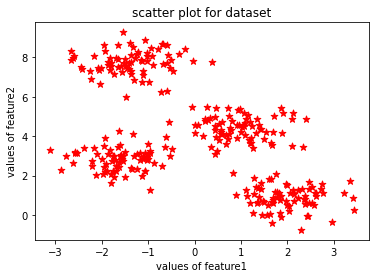

In [2]:
x = list(dataset.iloc[:,1])
y = list(dataset.iloc[:,2])
X = dataset.iloc[:,[1,2]].values
plt.scatter(x,y,s=50,c ="red", marker = "*")
plt.xlabel('values of feature1')
plt.ylabel('values of feature2')
plt.title('scatter plot for dataset')

# 3.K-Means algorithm

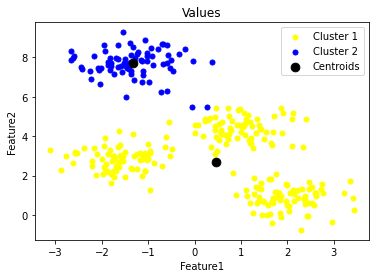

In [3]:
#k=2
kmeans = KMeans(n_clusters=2).fit(X)
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 30)
y_kmeans = kmeans.fit_predict(X)
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 25, c = 'yellow', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 25, c = 'blue', label = 'Cluster 2')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],s = 75, c = 'black', label = 'Centroids')
plt.title('Values')
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.legend()
plt.show()

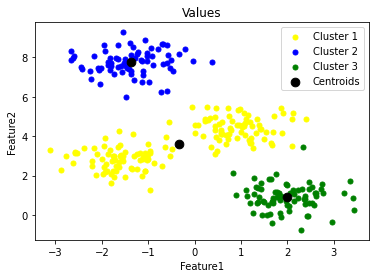

In [4]:
#k=3
kmeans = KMeans(n_clusters=3).fit(X)
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 30)
y_kmeans = kmeans.fit_predict(X)
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 25, c = 'yellow', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 25, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 25, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 75, c = 'black', label = 'Centroids')
plt.title('Values')
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.legend()
plt.show()

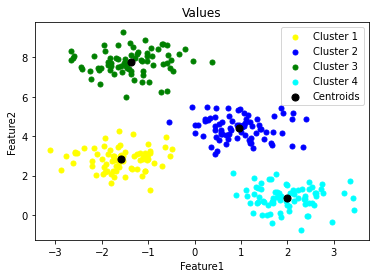

In [5]:
#k=4
kmeans = KMeans(n_clusters=4).fit(X)
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 25, c = 'yellow', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 25, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 25, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 25, c = 'cyan', label = 'Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 50, c = 'black', label = 'Centroids')
plt.title('Values')
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.legend()
plt.show()

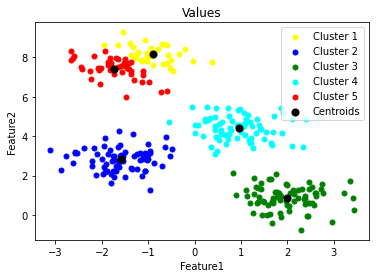

In [6]:
#k=5
kmeans = KMeans(n_clusters=5).fit(X)
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 25, c = 'yellow', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 25, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 25, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 25, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 25, c = 'red', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 50, c = 'black', label = 'Centroids')
plt.title('Values')
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.legend()
plt.show()

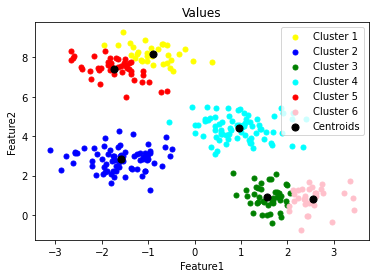

In [7]:
#k=6
kmeans = KMeans(n_clusters=6).fit(X)
kmeans = KMeans(n_clusters = 6, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 25, c = 'yellow', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 25, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 25, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 25, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 25, c = 'red', label = 'Cluster 5')
plt.scatter(X[y_kmeans == 5, 0], X[y_kmeans == 5, 1], s = 25, c = 'pink', label = 'Cluster 6')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 50, c = 'black', label = 'Centroids')
plt.title('Values')
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.legend()
plt.show()

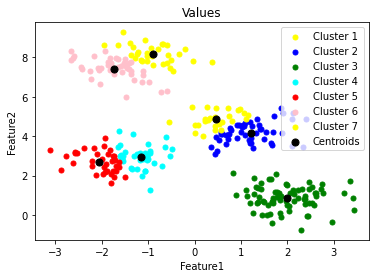

In [8]:
#k=7
kmeans = KMeans(n_clusters=7).fit(X)
kmeans = KMeans(n_clusters = 7, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 25, c = 'yellow', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 25, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 25, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 25, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 25, c = 'red', label = 'Cluster 5')
plt.scatter(X[y_kmeans == 5, 0], X[y_kmeans == 5, 1], s = 25, c = 'pink', label = 'Cluster 6')
plt.scatter(X[y_kmeans == 6, 0], X[y_kmeans == 6, 1], s = 25, c = 'yellow', label = 'Cluster 7')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 50, c = 'black', label = 'Centroids')
plt.title('Values')
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.legend()
plt.show()

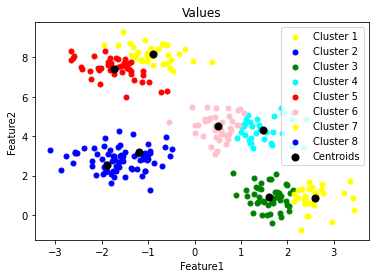

In [9]:
#k=8
kmeans = KMeans(n_clusters=8).fit(X)
kmeans = KMeans(n_clusters = 8, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 25, c = 'yellow', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 25, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 25, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 25, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 25, c = 'red', label = 'Cluster 5')
plt.scatter(X[y_kmeans == 5, 0], X[y_kmeans == 5, 1], s = 25, c = 'pink', label = 'Cluster 6')
plt.scatter(X[y_kmeans == 6, 0], X[y_kmeans == 6, 1], s = 25, c = 'yellow', label = 'Cluster 7')
plt.scatter(X[y_kmeans == 7, 0], X[y_kmeans == 7, 1], s = 25, c = 'blue', label = 'Cluster 8')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 50, c = 'black', label = 'Centroids')
plt.title('Values')
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.legend()
plt.show()

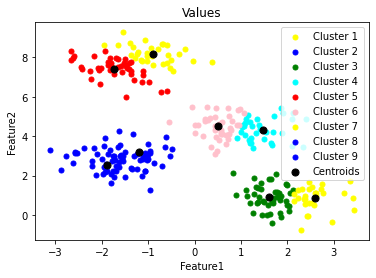

In [10]:
#k=9
kmeans = KMeans(n_clusters=8).fit(X)
kmeans = KMeans(n_clusters = 8, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 25, c = 'yellow', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 25, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 25, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 25, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 25, c = 'red', label = 'Cluster 5')
plt.scatter(X[y_kmeans == 5, 0], X[y_kmeans == 5, 1], s = 25, c = 'pink', label = 'Cluster 6')
plt.scatter(X[y_kmeans == 6, 0], X[y_kmeans == 6, 1], s = 25, c = 'yellow', label = 'Cluster 7')
plt.scatter(X[y_kmeans == 7, 0], X[y_kmeans == 7, 1], s = 25, c = 'blue', label = 'Cluster 8')
plt.scatter(X[y_kmeans == 8, 0], X[y_kmeans == 8, 1], s = 25, c = 'blue', label = 'Cluster 9')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 50, c = 'black', label = 'Centroids')
plt.title('Values')
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.legend()
plt.show()

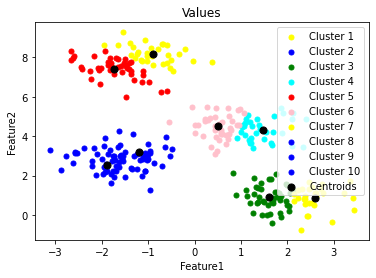

In [11]:
#k=10
kmeans = KMeans(n_clusters=8).fit(X)
kmeans = KMeans(n_clusters = 8, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 25, c = 'yellow', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 25, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 25, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 25, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 25, c = 'red', label = 'Cluster 5')
plt.scatter(X[y_kmeans == 5, 0], X[y_kmeans == 5, 1], s = 25, c = 'pink', label = 'Cluster 6')
plt.scatter(X[y_kmeans == 6, 0], X[y_kmeans == 6, 1], s = 25, c = 'yellow', label = 'Cluster 7')
plt.scatter(X[y_kmeans == 7, 0], X[y_kmeans == 7, 1], s = 25, c = 'blue', label = 'Cluster 8')
plt.scatter(X[y_kmeans == 8, 0], X[y_kmeans == 8, 1], s = 25, c = 'blue', label = 'Cluster 9')
plt.scatter(X[y_kmeans == 9, 0], X[y_kmeans == 9, 1], s = 25, c = 'blue', label = 'Cluster 10')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 50, c = 'black', label = 'Centroids')
plt.title('Values')
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.legend()
plt.show()

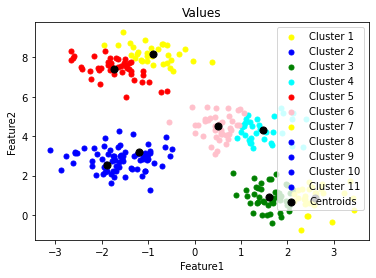

In [12]:
#k=11
kmeans = KMeans(n_clusters=8).fit(X)
kmeans = KMeans(n_clusters = 8, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 25, c = 'yellow', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 25, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 25, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 25, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 25, c = 'red', label = 'Cluster 5')
plt.scatter(X[y_kmeans == 5, 0], X[y_kmeans == 5, 1], s = 25, c = 'pink', label = 'Cluster 6')
plt.scatter(X[y_kmeans == 6, 0], X[y_kmeans == 6, 1], s = 25, c = 'yellow', label = 'Cluster 7')
plt.scatter(X[y_kmeans == 7, 0], X[y_kmeans == 7, 1], s = 25, c = 'blue', label = 'Cluster 8')
plt.scatter(X[y_kmeans == 8, 0], X[y_kmeans == 8, 1], s = 25, c = 'blue', label = 'Cluster 9')
plt.scatter(X[y_kmeans == 9, 0], X[y_kmeans == 9, 1], s = 25, c = 'blue', label = 'Cluster 10')
plt.scatter(X[y_kmeans == 10, 0], X[y_kmeans == 10, 1], s = 25, c = 'blue', label = 'Cluster 11')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 50, c = 'black', label = 'Centroids')
plt.title('Values')
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.legend()
plt.show()

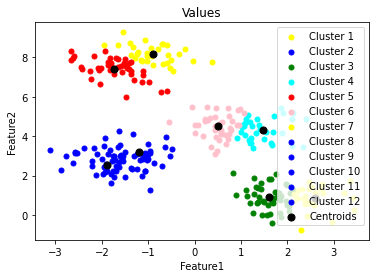

In [13]:
#k=11
kmeans = KMeans(n_clusters=8).fit(X)
kmeans = KMeans(n_clusters = 8, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 25, c = 'yellow', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 25, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 25, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 25, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 25, c = 'red', label = 'Cluster 5')
plt.scatter(X[y_kmeans == 5, 0], X[y_kmeans == 5, 1], s = 25, c = 'pink', label = 'Cluster 6')
plt.scatter(X[y_kmeans == 6, 0], X[y_kmeans == 6, 1], s = 25, c = 'yellow', label = 'Cluster 7')
plt.scatter(X[y_kmeans == 7, 0], X[y_kmeans == 7, 1], s = 25, c = 'blue', label = 'Cluster 8')
plt.scatter(X[y_kmeans == 8, 0], X[y_kmeans == 8, 1], s = 25, c = 'blue', label = 'Cluster 9')
plt.scatter(X[y_kmeans == 9, 0], X[y_kmeans == 9, 1], s = 25, c = 'blue', label = 'Cluster 10')
plt.scatter(X[y_kmeans == 10, 0], X[y_kmeans == 10, 1], s = 25, c = 'blue', label = 'Cluster 11')
plt.scatter(X[y_kmeans == 11, 0], X[y_kmeans == 11, 1], s = 25, c = 'blue', label = 'Cluster 12')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 50, c = 'black', label = 'Centroids')
plt.title('Values')
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.legend()
plt.show()

In [11]:
# k=4 is the appropriate value based on observations